# import packages

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['animation.html']='jshtml'
import time
%matplotlib notebook

# functions and their derivatives


In [132]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def derivative_sigmoid (Z):
    return Z *(1-Z)

def tanh(Z):
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

def derivative_tanh(Z):
    return 1-Z**2

def relu(Z):
    return np.maximum(0,Z)

def derivative_relu(Z):
    return  np.where(Z>0,1,0)

def leaky_relu(Z):
    return np.where(Z>0,Z,0.01*Z)

def derivative_leaky_relu(Z):
    return np.where(Z>0,1,0.01)

def elu(Z):
    return np.where(Z>0,Z,(0.01*(np.exp(Z)-1)))

def derivative_elu(Z):
    return np.where(Z>0,1,(0.1*(np.exp(Z))))

def preLU(Z,alpha=0.1):
    return np.where(Z>0,Z,alpha*(Z))

def derivative_preLU(Z,alpha=0.1):
    return np.where(Z>0,1,alpha)

def softplus(Z):
    return np.log(1+np.exp(Z))

def derivative_softplus(Z):
    return np.exp(Z)/(1+np.exp(Z))

def swish(Z):
    return Z*(1/(1+np.exp(-Z)))

def derivative_swish(Z):
    return  Z*(sigmoid(Z)*(1-sigmoid(Z)))+sigmoid(Z)

def softmax(Z):
    expA=np.exp(Z-np.max(Z))
    return expA/expA.sum(axis=1,keepdims=True)

def derivative_softmax(Z):
    return Z*(1-Z)

# create a neural network layer

In [133]:
# Data set
from sklearn.datasets import make_moons,load_iris,load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.metrics import classification_report,f1_score,accuracy_score

In [134]:
# Iris dataset
iris_data = load_iris()

iris_X,iris_y = iris_data.data,iris_data.target

In [135]:
# Breast cancer dataset
breast_cancer_data = load_breast_cancer()

bc_X,bc_y = breast_cancer_data.data,breast_cancer_data.target

In [136]:
# Bank Note

bank_data = pd.read_csv(r'Breast Cancer Data.csv')

bank_data = {'data':bank_data.iloc[:,:-1].values,'target':bank_data.iloc[:,-1].values}

In [137]:
bank_X,bank_y = bank_data['data'],bank_data['target']

<IPython.core.display.Javascript object>


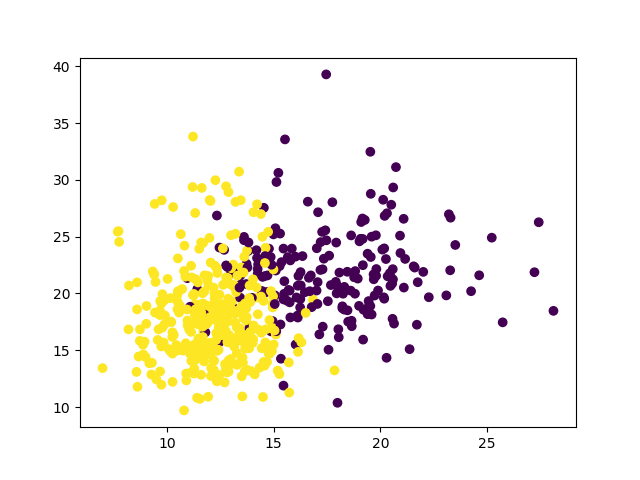

In [138]:
plt.scatter(bc_X[:,0],bc_X[:,1],c=bc_y)

In [139]:
def one_hot_encoding(y):
    
    res = np.zeros((len(y),len(np.unique(y))),dtype=int)
    
    for i in range(len(y)):
        
        res[i,y[i]]=1
    return res
        

# Neural Network

In [140]:
class Neural_Net:
    
    def __init__(self,units=5,activation='sigmoid',optimizer='adam',lr=0.01,iteration=1000,epochs=5,plot=False):
        self.units=units
        self.activation=activation
        self.optimizer=optimizer
        self.lr=lr
        self.iteration=iteration
        self.epochs=epochs
        self.plot = plot

    def _weight_init(self): # He init method 
        
        self.W1=np.random.normal(loc=0,scale=np.sqrt(2/(self.X.shape[1])),size=(self.X.shape[1],self.units))
        self.b1=np.zeros(self.units)
        self.W2=np.random.normal(loc=0,scale=np.sqrt(2/(self.units)),size=(self.units,self.y.shape[1]))
        self.b2=np.zeros(self.y.shape[1])
        
    def _forward_propagation(self,X):
        
        Z1 = np.dot(X,self.W1)+self.b1
        
     # Activation

        A1 = eval(self.activation+'(Z1)')
        

    # Hidden layer

        Z2 = np.dot(A1,self.W2)+self.b2
        

    # Output layer

        y_p = softmax(Z2)
        
        
        return Z1,A1,Z2,y_p
        
    def fit(self,X,y):
        
        self.X=X
        self.y=y
        
        self.parameters_vs_epochs = {}
        
        self.cost_vs_epochs =np.array([0,0])
        
        # initializing weights
        
        self._weight_init()
        
        # Plot 
        if self.plot==True:
            
            self.fig = plt.figure(figsize=(10,6))
            self.ax1 = self.fig.add_subplot(111)
                
        for epoch in range(1,self.epochs+1):
            
            self.old_W1,self.old_b1,self.old_W2,self.old_b2=0,0,0,0
            
            self.GW1,self.Gb1,self.GW2,self.Gb2=0,0,0,0       
            
            
            for i in range(self.iteration):
                
            # Forward probagation
            
                    Z1,A1,Z2,y_p = self._forward_propagation(self.X)
                
            # Cost 
                    self.cost = -(np.sum(self.y*np.log(y_p)))
                
            
            # Back probagation
            
                    dW2 =((self.y-y_p)).T.dot(A1)
                
                    db2=(self.y-y_p).sum(axis=0)
                    
                    derivative_act=eval('derivative_'+self.activation+'(A1)')                
                    
                    dW1=(((self.y-y_p).dot(self.W2.T)*(derivative_act)))
                    
                    dW1 = X.T.dot(dW1)
                    
                    db1=(((self.y-y_p).dot(self.W2.T)*derivative_act)).sum(axis=0)

            # Weight Updation 
            
                    eval('self._{}'.format(self.optimizer))(dW2,db2,dW1,db1)
            
            # storing updation details
                    
            self.parameters_vs_epochs[epoch]=[self.W1,self.b1,self.W2,self.b2]
            self.cost_vs_epochs=np.vstack([self.cost_vs_epochs,[epoch,self.cost]])
            
            # Ploting cost function
            
            if self.plot==True:
                
                self._plot(epoch)

            
    def _plot(self,epoch):
        
        self.ax1.scatter(self.cost_vs_epochs[1:,0],self.cost_vs_epochs[1:,1])
        self.ax1.plot(self.cost_vs_epochs[1:,0],self.cost_vs_epochs[1:,1])
        plt.ylabel('loss {}'.format(np.round(self.cost,decimals=7)))
        plt.xlabel('Epochs {}'.format(epoch))
        plt.title('Loss vs Epochs')
        self.fig.canvas.draw()
        time.sleep(0.005)

    def _adam(self,dW2,db2,dW1,db1,eps=0.000001):
        
        # Momentum
        
        self.old_W1 = (self.old_W1*0.9)+((1-0.9)*dW1)
        self.old_b1 = (self.old_b1*0.9)+((1-0.9)*db1)
        self.old_W2 = (self.old_W2*0.9)+((1-0.9)*dW2)
        self.old_b2 = (self.old_b2*0.9)+((1-0.9)*db2)
        
        # RMS prob
        
        self.GW1 = (self.GW1*0.95)+((1-0.95)*dW1**2)
        self.Gb1 = (self.Gb1*0.95)+((1-0.95)*db1**2)
        self.GW2 = (self.GW2*0.95)+((1-0.95)*dW2**2)
        self.Gb2 = (self.Gb2*0.95)+((1-0.95)*db2**2)
        
        # Weight Updation

        self.W1=self.W1+(self.lr/(np.sqrt(self.GW1+eps)))*self.old_W1
        self.b1=self.b1+(self.lr/(np.sqrt(self.Gb1+eps)))*self.old_b1
        self.W2=self.W2+((self.lr/(np.sqrt(self.GW2+eps)))*self.old_W2).T
        self.b2=self.b2+(self.lr/(np.sqrt(self.Gb2+eps)))*self.old_b2
        
    def _GD(self,dW2,db2,dW1,db1):
        
        self.W1 = self.W1+(self.lr*dW1)
        self.b1 = self.b1+(self.lr*db1)
        self.W2 = self.W2+(self.lr*dW2).T
        self.b2 = self.b2+(self.lr*db2)
        
        
    def predict(self,X):
        
        _,_,_,predicted = self._forward_propagation(X)
        
        result = [500 for i in range(len(X))]
        
        for i in range(len(X)):
            
            ind = np.argmax(predicted[i])
            
            result[i]=ind
            
        return result
    def score(self,X,y):
        
        y= one_hot_encoding(y)
        
        _,_,_,predicted = self._forward_propagation(X)
        
        cost = -(np.sum(y*np.log(predicted)))
        
        return cost
            

In [141]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(iris_X,iris_y,test_size=0.3)

In [142]:
# Normalization

scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [143]:
# Training

<IPython.core.display.Javascript object>


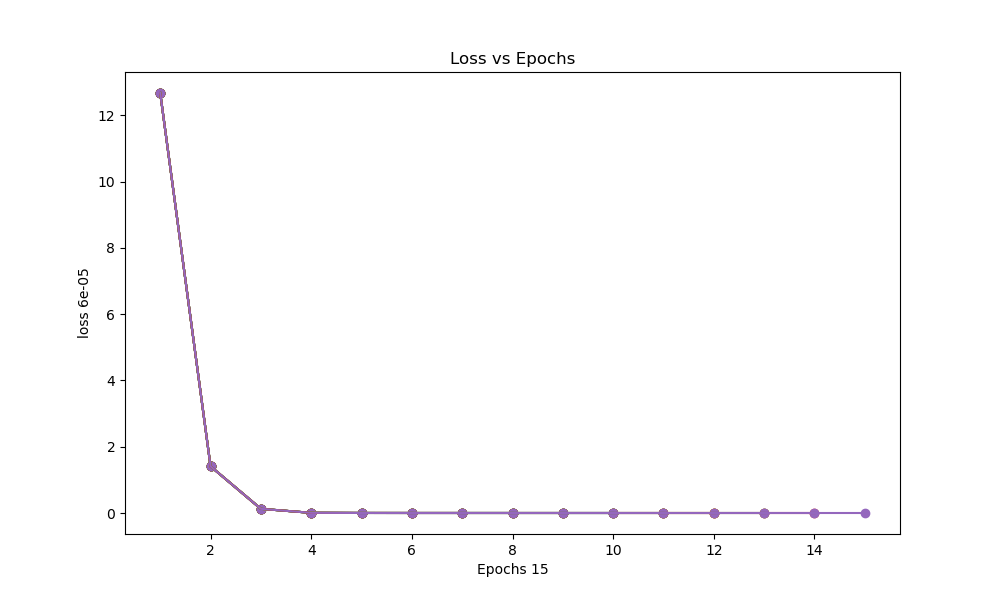

In [146]:
model = Neural_Net(lr=0.001,activation='leaky_relu',epochs=15,plot=True) 
model.fit(X_train,one_hot_encoding(y_train))

# Prediction

In [147]:
predicted=model.predict(X_test)

# Evaluation

In [148]:
report = pd.DataFrame(classification_report(y_test,predicted,output_dict=True)).transpose()

In [149]:
report

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,14.0
1,0.941176,0.888889,0.914286,18.0
2,0.857143,0.923077,0.888889,13.0
micro avg,0.933333,0.933333,0.933333,45.0
macro avg,0.932773,0.937322,0.934392,45.0
weighted avg,0.935201,0.933333,0.933616,45.0


# Training and test loss

In [150]:
training_loss = model.score(X_train,y_train)

test_loss = model.score(X_test,y_test)

print("Train_loss: ",training_loss)
print("test_loss: ",test_loss)

Train_loss:  5.998397798419447e-05
test_loss:  30.159617704984186


# Cross validation

In [151]:
from sklearn.model_selection import StratifiedKFold,KFold

In [152]:
def cross_validate(X,y,cv=10):
    
    model = Neural_Net(lr=0.001,activation='leaky_relu') 
    
    fold=StratifiedKFold(cv)
    
    corss_val_f1 = []
    cross_val_accuracy = []
    
    for train,test in fold.split(X,y):
    
    # Spliting 
        X_train,y_train,X_test,y_test = X[train],y[train],X[test],y[test]
        
    # Training
      
        model.fit(X_train,one_hot_encoding(y_train))
        
    # Prediction
        predicted=model.predict(X_test)
    # Evaluation
        
        f_score = f1_score(y_test,predicted,average='micro')
        accuracy = accuracy_score(y_test,predicted)
        corss_val_f1.append(f_score)
        cross_val_accuracy.append(accuracy)
#     return corss_val_f1,cross_val_accuracy
    return np.mean(corss_val_f1),np.mean(cross_val_accuracy)

In [153]:
cross_validate(iris_X,iris_y)

(0.9800000000000001, 0.9800000000000001)

# Accuracy 

In [154]:
activation_functions = ['sigmoid','tanh','relu','leaky_relu','elu','preLU','softplus']

data_sets = [breast_cancer_data]
#data_sets = [iris_data,bank_data,breast_cancer_data]

data_sets123 = ['breast_cancer_data']
#data_sets123 = ['iris_data','bank_data','breast_cancer_data']

best_activation = {}

final_accuracy={}

ind=0

for data in data_sets:
    
        # Splitting the data
    
        X,y = data['data'],data['target']
#         X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
        
        # Normalizing the data
        
        scaler =StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        cros_val = -1
        best_f1 =-1
    
        for act in activation_functions:


            # Training the model

            model = Neural_Net(lr=0.001,activation=act) 
            model.fit(X_train,one_hot_encoding(y_train))

            # Prediction 

            predicted=model.predict(X_test)

            # Evaluation 

            cur_f1=f1_score(y_test,predicted,average='micro')
            accuracy = accuracy_score(y_test,predicted)

            if cur_f1>best_f1:
                best_f1=cur_f1
                best_activation[data_sets123[ind]]=act
                final_accuracy[data_sets123[ind]]=accuracy

        print(data_sets123[ind]+' is over')

        best_f1=-1

        ind+=1


breast_cancer_data is over


In [155]:
best_activation

{'breast_cancer_data': 'softplus'}

In [156]:
final_accuracy

{'breast_cancer_data': 0.9777777777777777}